In [1]:
%matplotlib inline

# Import spatial data in AnnData and Squidpy

This tutorial shows how to store spatial datasets in `anndata.AnnData`.

Spatial molecular data comes in many different formats, and to date
there is no one-size-fit-all solution for reading spatial data in
Python. Scanpy already provides a solution for Visium Spatial
transcriptomics data with the function `scanpy.read_visium` but that is
basically it. Here in Squidpy, we do provide some pre-processed (and
pre-formatted) datasets, with the module `squidpy.datasets` but it\'s
not very useful for the users who need to import their own data.

In this tutorial, we will showcase how spatial data are stored in
`anndata.AnnData`. We will use mock datasets for this purpose, yet
showing with examples the important details that you should take care of
in order to exploit the full functionality of the
*AnnData-Scanpy-Squidpy* ecosystem.


In [3]:
from anndata import AnnData
import scanpy as sc
import squidpy as sq

from numpy.random import default_rng

import matplotlib.pyplot as plt

sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.3 pandas==1.5.1 scikit-learn==1.1.3 statsmodels==0.13.5 python-igraph==0.10.2 pynndescent==0.5.8
squidpy==1.2.3


# Spatial coordinates in AnnData

First, let\'s generate some data. We will need:

> -   an array of features (e.g. counts).
> -   an array of spatial coordinates.
> -   an image array (e.g. the tissue image).


In [4]:
rng = default_rng(42)
counts = rng.integers(0, 15, size=(10, 100))  # feature matrix
coordinates = rng.uniform(0, 10, size=(10, 2))  # spatial coordinates
image = rng.uniform(0, 1, size=(10, 10, 3))  # image

In [9]:
counts.shape

(10, 100)

In [10]:
coordinates

array([[7.36705688, 8.86402887],
       [9.21057197, 5.03632925],
       [5.20275115, 7.99870411],
       [3.14450692, 8.37382362],
       [4.94141647, 1.15856724],
       [0.72059147, 8.41993211],
       [0.55567917, 2.80611436],
       [3.34130041, 1.72994445],
       [3.1389337 , 7.42692567],
       [0.14682844, 8.27173425]])

In [11]:
coordinates.shape

(10, 2)

In [12]:
image

array([[[0.85654802, 0.37226157, 0.1536129 ],
        [0.60084041, 0.11967256, 0.36491936],
        [0.95842918, 0.99546447, 0.77210489],
        [0.31096151, 0.68766505, 0.70540637],
        [0.3878417 , 0.64088863, 0.01072764],
        [0.20905766, 0.5250883 , 0.1637513 ],
        [0.16590687, 0.83630429, 0.989133  ],
        [0.55596943, 0.83906973, 0.99032166],
        [0.14159589, 0.44824561, 0.39257272],
        [0.08004928, 0.75533017, 0.43377903]],

       [[0.46932693, 0.15067297, 0.18092665],
        [0.90710362, 0.04464909, 0.23285228],
        [0.29205933, 0.49019754, 0.58644517],
        [0.49328998, 0.08411533, 0.24366745],
        [0.84358838, 0.6375887 , 0.64914905],
        [0.67020326, 0.76290302, 0.05810848],
        [0.36660838, 0.53952744, 0.33845648],
        [0.84447887, 0.48257251, 0.76862759],
        [0.85201552, 0.50479148, 0.90955224],
        [0.58712394, 0.8502743 , 0.3405908 ]],

       [[0.49881696, 0.53141104, 0.10497972],
        [0.39855251, 0.9173376

In [13]:
image.shape

(10, 10, 3)

Let\'s first start with creating the `anndata.AnnData` object. We will
first just use the count matrix and the spatial coordinates. Specify the
`anndata.AnnData.obsm` key as [\'spatial\']{.title-ref} is not strictly
necessary but will save you a lot of typing since it\'s the default for
both Squidpy and Scanpy.


In [14]:
adata = AnnData(counts, obsm={"spatial": coordinates})

/tmp/ipykernel_131567/2678445132.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = AnnData(counts, obsm={"spatial": coordinates})


Next, let\'s run a standard Scanpy clustering and umap workflow.


In [15]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)
adata

AnnData object with n_obs × n_vars = 10 × 100
    obs: 'leiden'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

We can visualize the dummy cluster annotation `adata.obs['leiden']` in
space.


/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


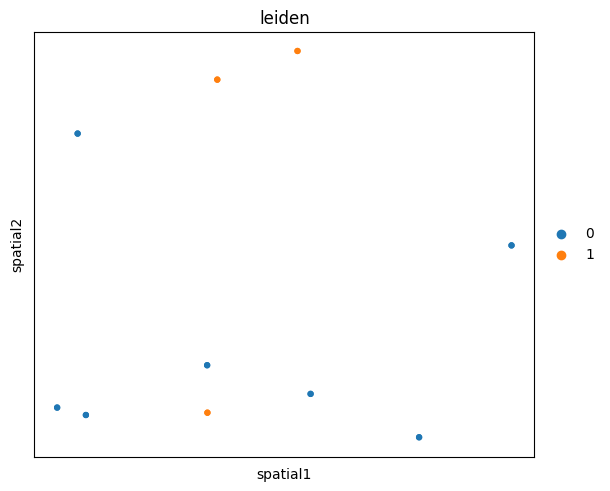

In [16]:
sq.pl.spatial_scatter(adata, shape=None, color="leiden", size=50)

# Tissue image in AnnData

For use cases where there is no tissue image, this is all you need to
start using Scanpy/Squidpy for your analysis. For instance, you can
compute a spatial graph with `squidpy.gr.spatial_neighbors` based on a
fixed neighbor radius that is informative given your experimental
settings.


/home/ifichtner/anaconda3/envs/squidpy/lib/python3.8/site-packages/squidpy/pl/_spatial_utils.py:955: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


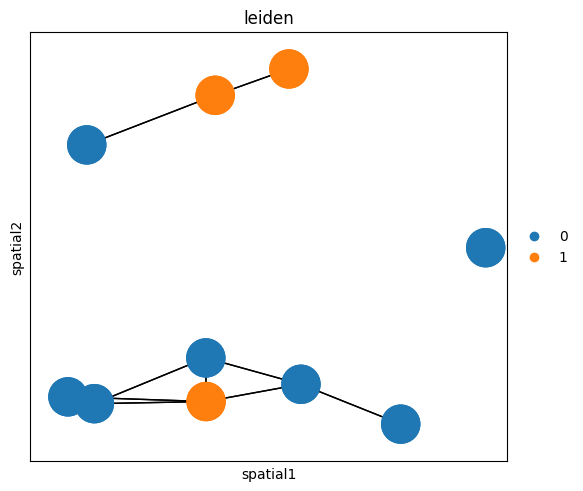

In [17]:
sq.gr.spatial_neighbors(adata, radius=3.0)
sq.pl.spatial_scatter(
    adata,
    color="leiden",
    connectivity_key="spatial_connectivities",
    edges_color="black",
    shape=None,
    edges_width=1,
    size=3000,
)

In case you do have an image of the tissue (or multiple, at different
resolutions) this is what you need to know to correctly store it in
AnnData. First, let\'s visualize the mock image from before.


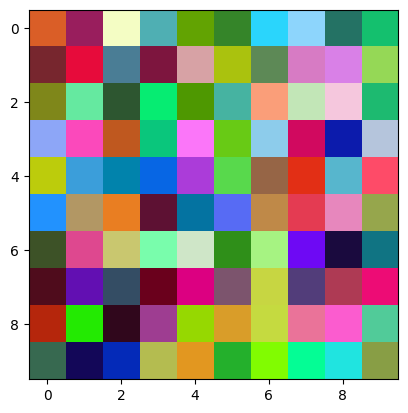

In [18]:
plt.imshow(image)

The image and its metadata are stored in the [uns]{.title-ref} slot of
`anndata.AnnData`. Specifically, in the
`adata.uns['spatial'][<library_id>]` slot, where
[library_id]{.title-ref} is any unique key that refers to the tissue
image.

For now, we will assume that there is only one image. This is the
necessary metadata:

> -   [tissue_hires_scalef]{.title-ref} - this is the scale factor
>     between the spatial coordinates units and the image pixels. In the
>     case of Visium, this is usually \~0.17. In this case, we assume
>     that the spatial coordinates are in the same scale of the pixels,
>     and so we will set this value to 1.
> -   [spot_diameter_fullres]{.title-ref} - this is the diameter of the
>     capture area for each observation. In the case of Visium, we
>     usually call them [\"spots\"]{.title-ref} and this value is set to
>     \~89.

Here, we will set it to 0.5.


In [19]:
spatial_key = "spatial"
library_id = "tissue42"
adata.uns[spatial_key] = {library_id: {}}
adata.uns[spatial_key][library_id]["images"] = {}
adata.uns[spatial_key][library_id]["images"] = {"hires": image}
adata.uns[spatial_key][library_id]["scalefactors"] = {"tissue_hires_scalef": 1, "spot_diameter_fullres": 0.5}

We don\'t provide the flexibility (yet) to change the values of such
keys. These are the keys provided by the Space Ranger output from 10x
Genomics Visium and therefore were the first to be adopted. In the
future, we might settle to a sightly different structure. But for now,
if all such key are correct, `squidpy.pl.spatial_scatter` works out of
the box.


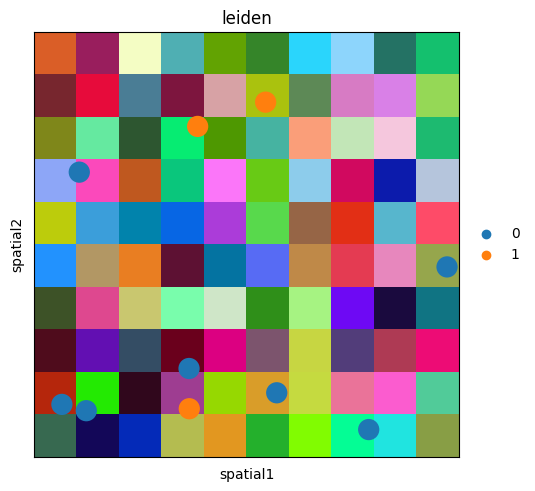

In [20]:
sq.pl.spatial_scatter(adata, color="leiden")

You can fiddle around with the settings to see what changes. For
instance, let\'s change [tissue_hires_scalef]{.title-ref} to half the
previous value.


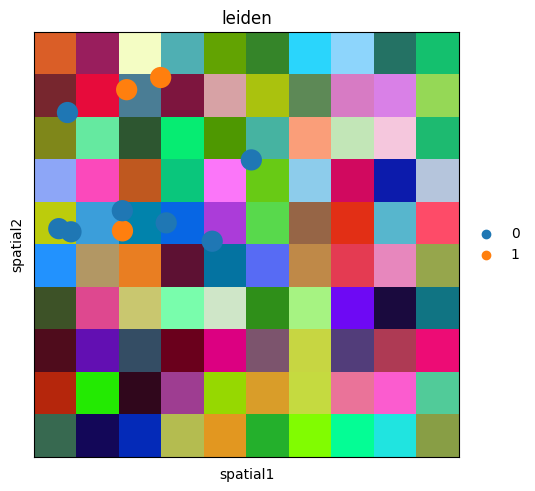

In [23]:
adata.uns[spatial_key][library_id]["scalefactors"] = {"tissue_hires_scalef": 0.5, "spot_diameter_fullres": 0.5}
sq.pl.spatial_scatter(adata, color="leiden", size=2)

As you can see, the spatial coordinates have been scaled down, and the
image was \"zoomed in\".

Of course, you might want to \"analyze\" such image.
`squidpy.im.ImageContainer` comes to the rescue! Just instantiate a new
object and it will work out of the box.


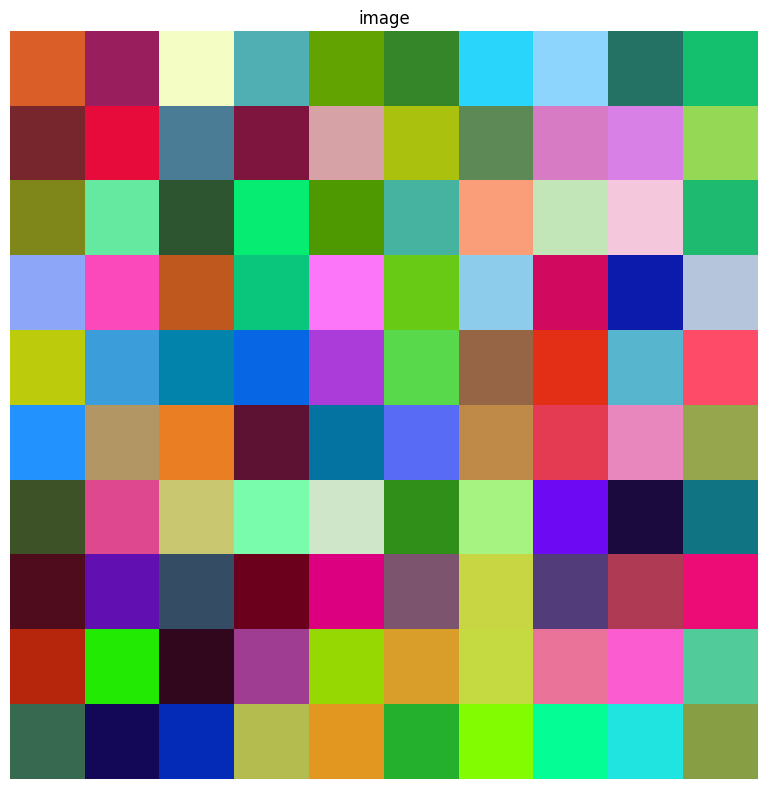

In [24]:
img = sq.im.ImageContainer(image)
img.show()

In [25]:
img

ImageContainer[shape=(10, 10), layers=['image']]

> IDF: lets try some other structure experimentation

In [29]:
adata.obs['new'] = [1, 1, 1, 1, 1, 2, 2, 2, 2, 3]
adata.obs

,leiden,new
0,0,1
1,0,1
2,0,1
3,1,1
4,1,1
5,0,2
6,0,2
7,1,2
8,0,2
9,0,3


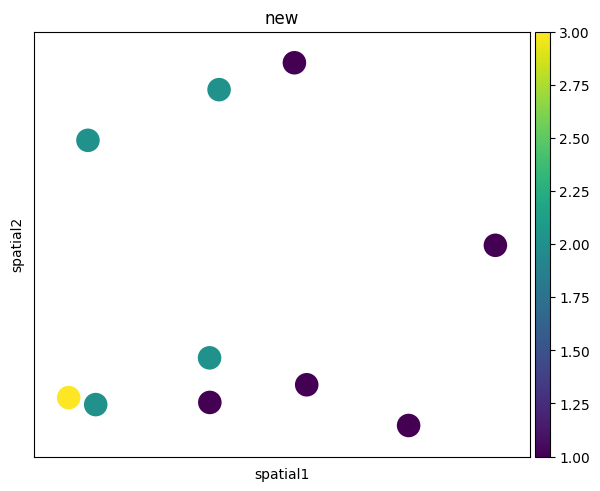

In [35]:
sq.pl.spatial_scatter(adata, color='new', img=False)